<a href="https://colab.research.google.com/github/darstih/POO-2019-2-Proyecto/blob/master/Microproyecto_3_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de la calidad del vino segun ciertas variables

### Definición de las bases de datos

In [0]:
dbwhite='winequality-white.csv'
dbred='winequality-red.csv'
ruta="/content/drive/Shared drives/IA micro-proyecto/Tercer micro proyecto/BaseDatos"

### Aspectos iniciales

#### Importación de librerias

In [0]:

from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
import seaborn as sb
import cv2
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir(ruta)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Funciones para predecir la calidad de vinos y para categorizar los datos

Es para arreglar las columnas que contengan decimales mal colocados

In [0]:
def categorizacionaux(var,data,rango,cant):
  columna=data[var]
  lim =columna.max()
  lim1 = columna.min()
  if rango ==(-1):
    aux1(var,data,rango=((lim-lim1)/cant),limsup=lim,liminf=lim1,columna=columna)
  else:
    aux1(var,data,rango,lim,lim1,columna)
def aux1(var,data,rango,limsup,liminf,columna):
  acum = 0
  acum1 = liminf+rango
  while(acum<=limsup):
    data.loc[(columna > acum) & (columna<= acum1),var]=acum1
    acum = acum1
    acum1 = acum1+rango
  data.loc[columna>limsup,var]=limsup

def aux2(df,a):
  if a == 'red':
    data = dbred
  elif a == 'white':
    data = dbwhite
  for i in data.drop('quality',axis=1).columns:
    columna= data[str(i)]
    limsup = columna.max()
    liminf = columna.min()
    
    aux1(str(i),df,(limsup-liminf)/cantidades[i],limsup,liminf,df[str(i)])
def categorizacion(var,rango,cant=0):
  categorizacionaux(var=var,data=dbwhite,rango=rango,cant=cant)
  categorizacionaux(var=var,data=dbred,rango=rango,cant=cant)

In [0]:
def probarVinoBlanco(dic):
  x_test = pd.DataFrame(columns=dic.keys())
  x_test.loc[0]=(dic['volatile acidity'],dic['residual sugar'],dic['chlorides'],
                 dic['free sulfur dioxide'], dic['pH'],
                 dic['sulphates'],dic['alcohol'],dic['quality'])
  
  y_pred = decision_tree1.predict(x_test.drop(['quality'], axis = 1))
  y_proba = decision_tree1.predict_proba(x_test.drop(['quality'], axis = 1))
  print("Prediccion: " + str(y_pred))
  print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred-3]* 100, 2))+"%")

def probarVinoRojo(dic):
  x_test = pd.DataFrame(columns=dic.keys())
  x_test.loc[0]=(dic['volatile acidity'],dic['residual sugar'],dic['chlorides'],
                 dic['free sulfur dioxide'], dic['pH'],
                 dic['sulphates'],dic['alcohol'],dic['quality'])
  
  y_pred = decision_tree2.predict(x_test.drop(['quality'], axis = 1))
  y_proba = decision_tree2.predict_proba(x_test.drop(['quality'], axis = 1))
  print("Prediccion: " + str(y_pred))
  print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred-3]* 100, 2))+"%")



In [0]:
def categ():
  # Se recomienda para una cantidad de datos mayor a 250, agrupar entre 10 y 20 clases, 
  # con lo cual esto sirvió como criterio para elegir las clases de agrupamiento, 
  # otro criterio fue la dispersión de los datos que se verá más, mostrando un aproximado de cuantas clases se divide.
  # Mapping 

  #Cantidad de categorias de densidad
  cantdensity = 10

  #Cantidad de categorias de fixed acidity
  cantfixedacidity=8

  #Cantidad de categorias de volatile acidity
  cantvolatileacidity=9 

  #Cantidad de categorias de citric acid
  cantcitricacid=7

  #Cantidad de categorias de residual sugar
  cantresidualsugar=10

  #Cantidad de categorias de chlorides
  cantchlorides=10

  #Cantidad de categorias de sulphates
  cantsulphates=10

  #Cantidad de categorias de free sulfur dioxide
  cantfreesulfur=10

  #Cantidad de categorias de total sulfur dioxide
  canttotalsulfur=10

  #Cantidad de categorias de pH
  cantpH=10

  # Cantidad de categorias de alcohol
  cantalcohol=10



  #categorizacion('density',-1,cant=cantdensity)	
  #categorizacion('fixed acidity',-1,cantfixedacidity)
  categorizacion('volatile acidity',-1,cantvolatileacidity)
  #categorizacion('citric acid',-1,cantcitricacid)
  categorizacion('residual sugar',-1,cantresidualsugar)
  categorizacion('chlorides',-1,cantchlorides)
  categorizacion('sulphates',-1,cantsulphates)
  categorizacion('free sulfur dioxide',-1,cantfreesulfur)
  #categorizacion('total sulfur dioxide',-1,canttotalsulfur)
  categorizacion('pH',-1,cantpH)
  categorizacion('alcohol',-1,cantalcohol)

  cantidades = {#'fixed acidity':cantfixedacidity,
              'volatile acidity':cantvolatileacidity,
              #'citric acid':cantcitricacid,
              'residual sugar':cantresidualsugar,
              #'density':cantdensity
              'free sulfur dioxide':cantfreesulfur,'pH':cantpH,'sulphates':cantsulphates,
              'alcohol':cantalcohol,
              #'total sulfur dioxide':canttotalsulfur
              'chlorides':cantchlorides}


#### Descripción del problema por parte de los autores


1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol

## Procesamiento de las base de datos

####Carga de las bases de datos


In [0]:
#separadores=';'
dbwhite = pd.read_csv(ruta+'/'+dbwhite,sep=';')
dbred = pd.read_csv(ruta+'/'+dbred,sep=';')



#### Categorización de los datos



La categorización se realiza con la función categ(), que posteriormente será llamada. Se recomienda para una cantidad de datos mayor a 250, agrupar entre 10 y 20 clases, con lo cual esto sirvió como criterio para elegir las clases de agrupamiento, otro criterio fue la dispersión de los datos que se verá más, mostrando un aproximado de cuantas clases se divide.


##### visualización


Descripción de los datos de vino blanco

In [0]:
dbwhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Descripción de los datos de vino rojo.

In [0]:
dbred.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
dbred.columns.size

12

#### Previsualización de los datos

##### Vino blanco

Observamos los datos de los vinos blanco

In [0]:
dbwhite.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [0]:
dbwhite.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


##### Vino rojo

In [0]:
dbred.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [0]:
dbred.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## Procesamiento de los datos (Estadística exploratoria, categorización y eliminación de correlación)

#### Vino blanco

##### Grafico de correlación

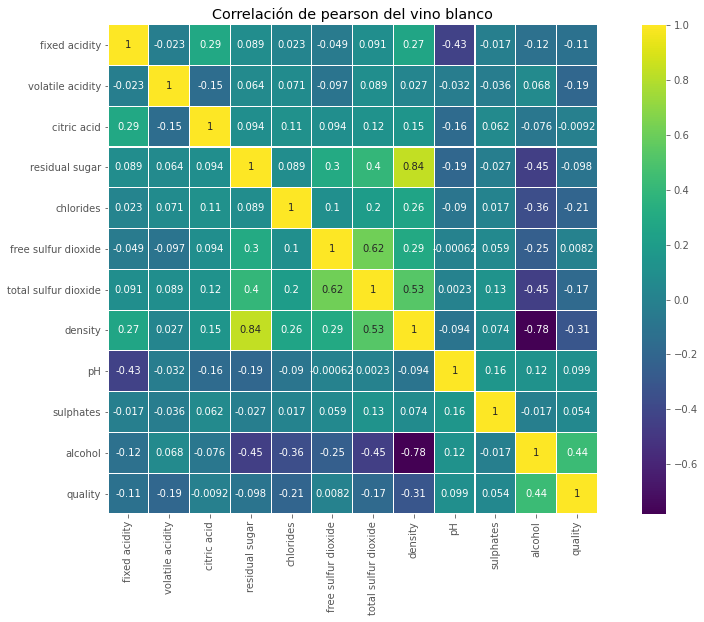

In [0]:
colormap = plt.cm.viridis
#plt.figure(figsize=(13,13))
plt.title('Correlación de pearson del vino blanco')
sb.heatmap(dbwhite.corr(),
          vmax=1.0,
          cmap=colormap,
          annot=True,
          linewidths=0.1,
          linecolor='white',
          square=True)

En este gráfico se puede observar las variables que por su correlación pueden inducir un sesgo en el árbol de decisión.

In [0]:
###Se eliminan las columnas con problema de correlación 
drop_elements = ['total sulfur dioxide','fixed acidity','density','citric acid']
dbwhite = dbwhite.drop(drop_elements, axis = 1)
#Se realiza la categorización de las variables.
categ()
dbwhite.head()


,volatile acidity,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,0.306667,26.68,0.0764,59.4,3.05,0.478,9.24,6
1,0.306667,7.12,0.0764,30.7,3.38,0.564,9.86,6
2,0.306667,7.12,0.0764,30.7,3.27,0.478,10.48,6
3,0.306667,13.64,0.0764,59.4,3.27,0.478,10.48,6
4,0.306667,13.64,0.0764,59.4,3.27,0.478,10.48,6


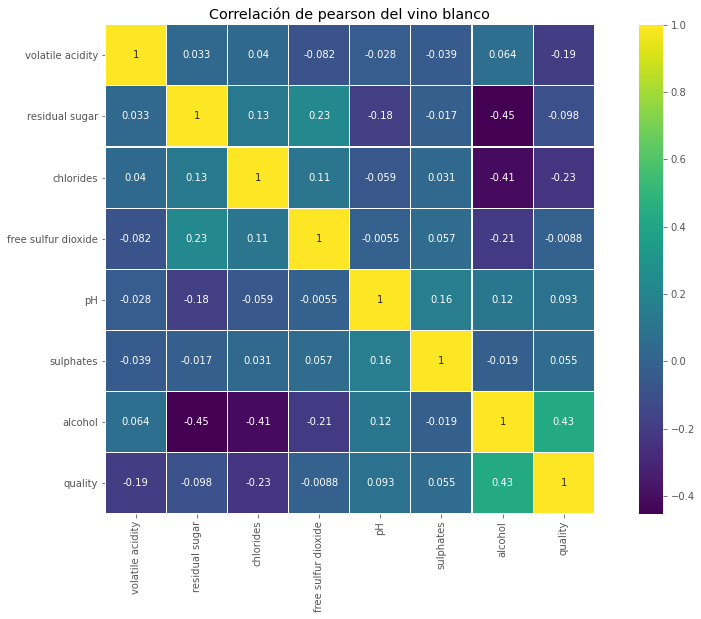

In [0]:
colormap = plt.cm.viridis
#plt.figure(figsize=(13,13))
plt.title('Correlación de pearson del vino blanco')
sb.heatmap(dbwhite.corr(),
          vmax=1.0,
          cmap=colormap,
          annot=True,
          linewidths=0.1,
          linecolor='white',
          square=True)

Se puede ver que ya no existe mayor correlación con estas variables.

##### Distribuciones

Se realiza el histograma por cada columna de la tabla.

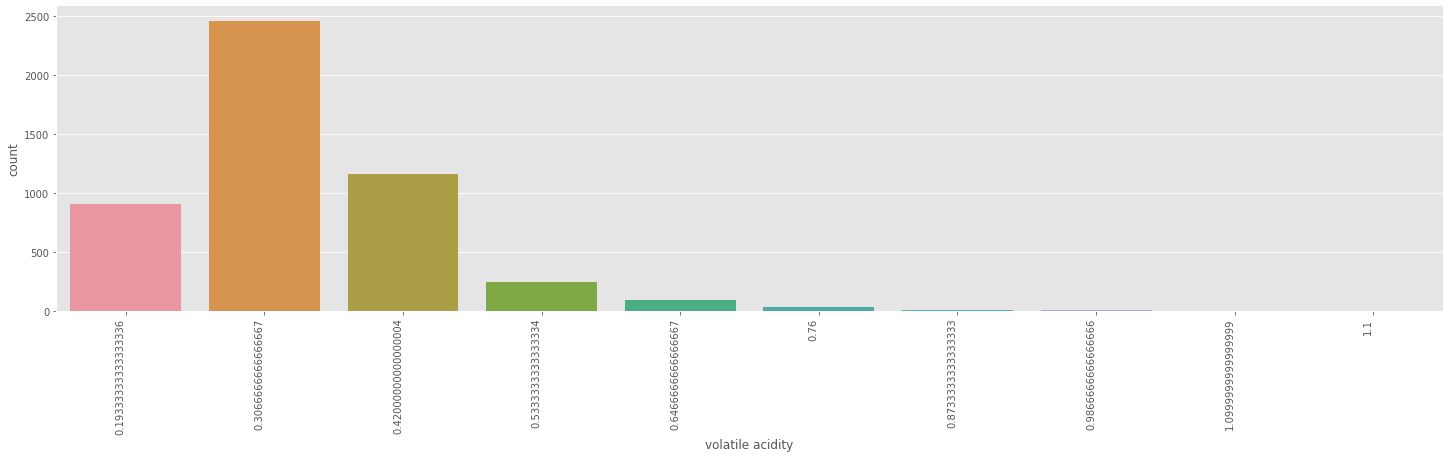

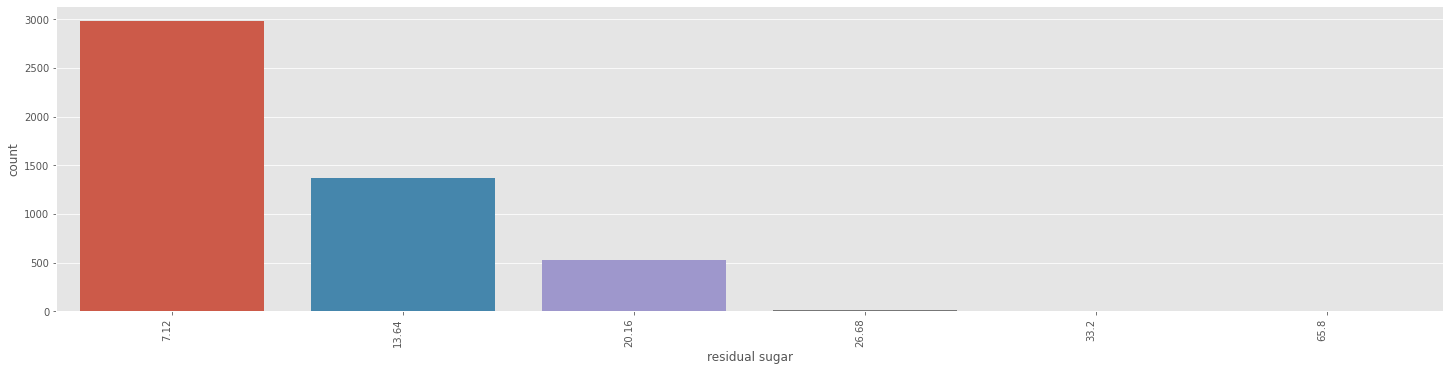

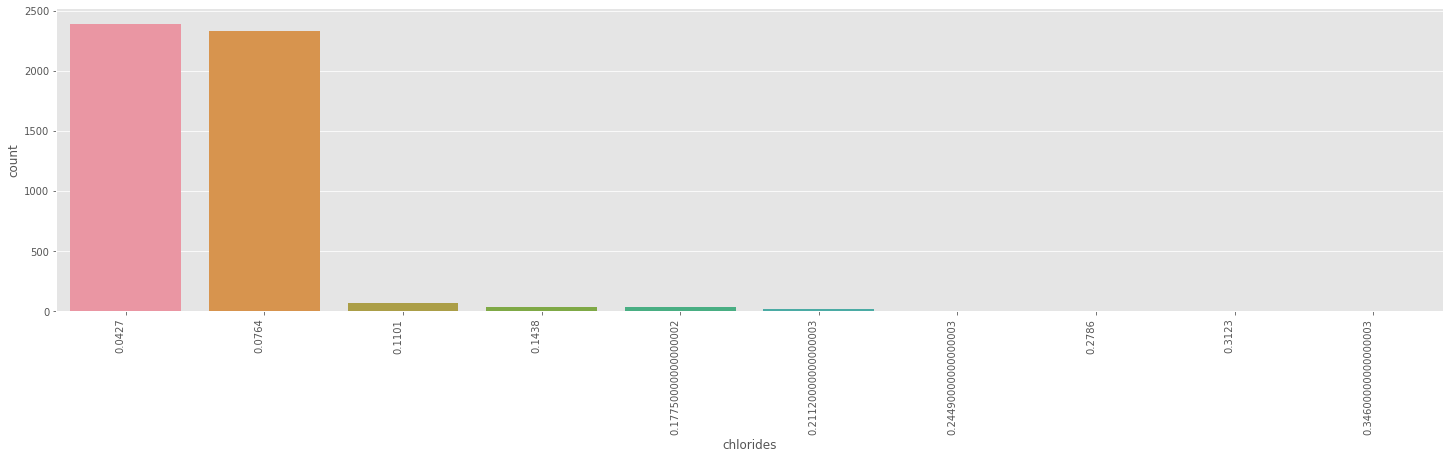

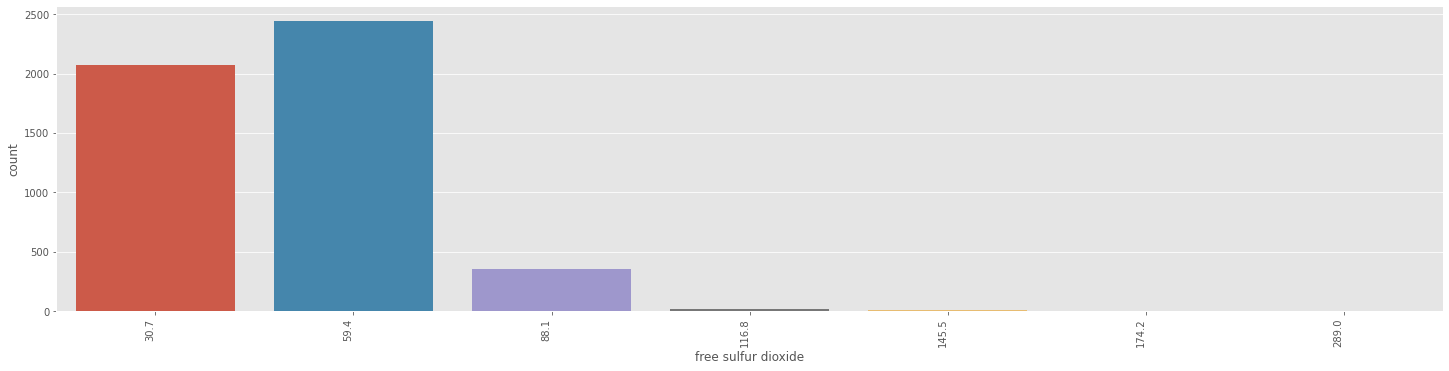

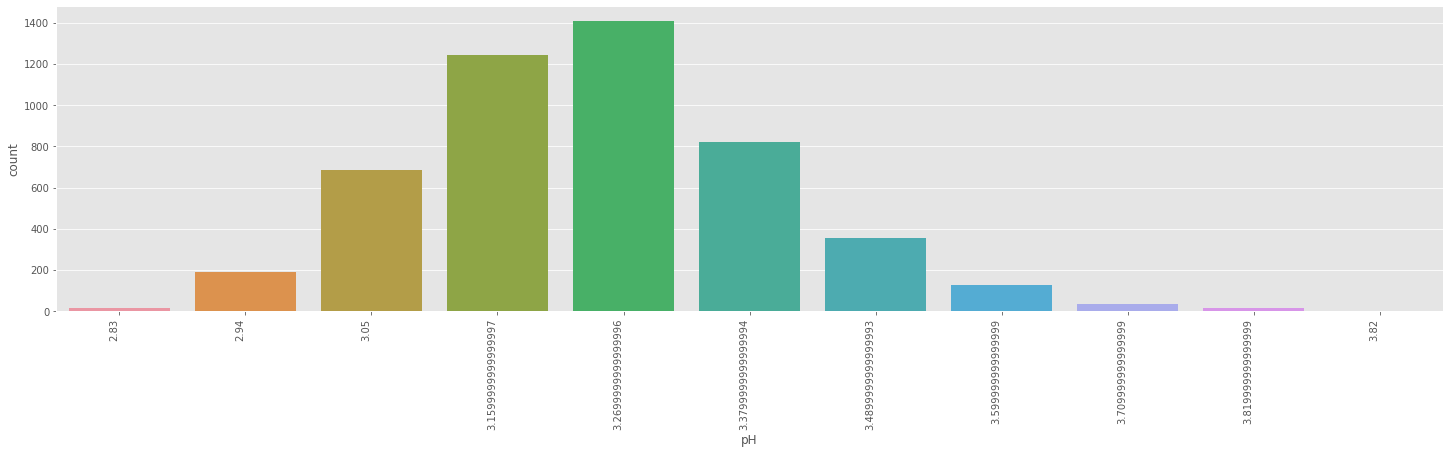

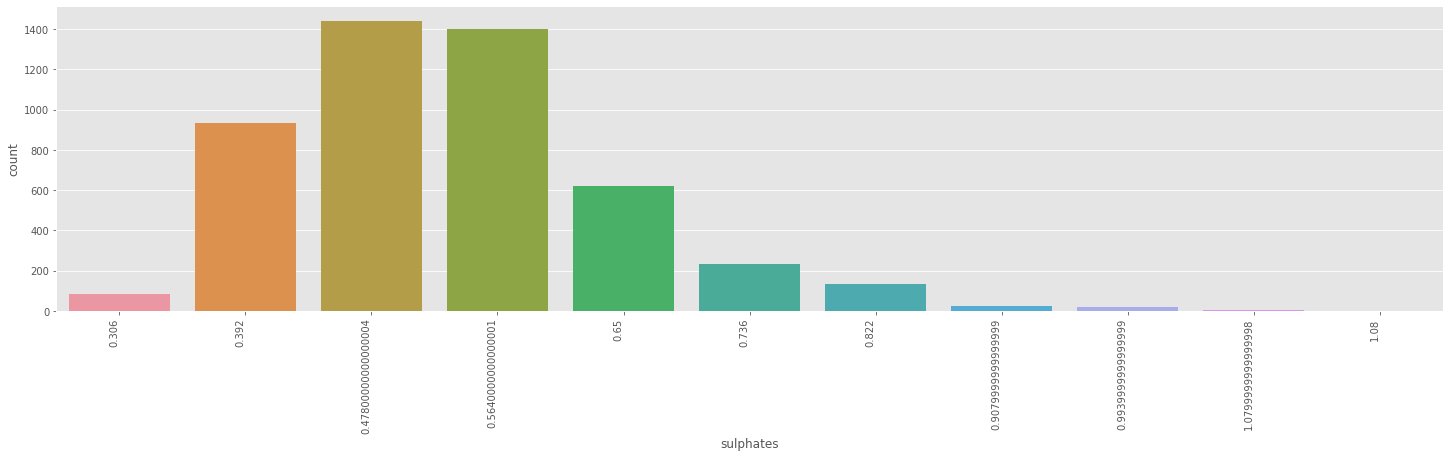

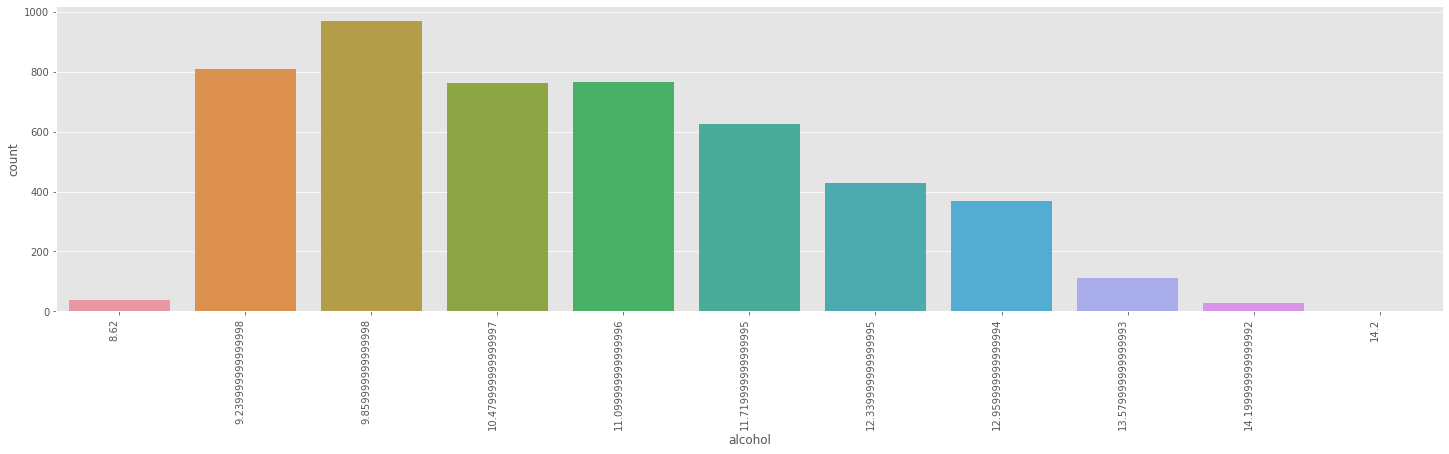

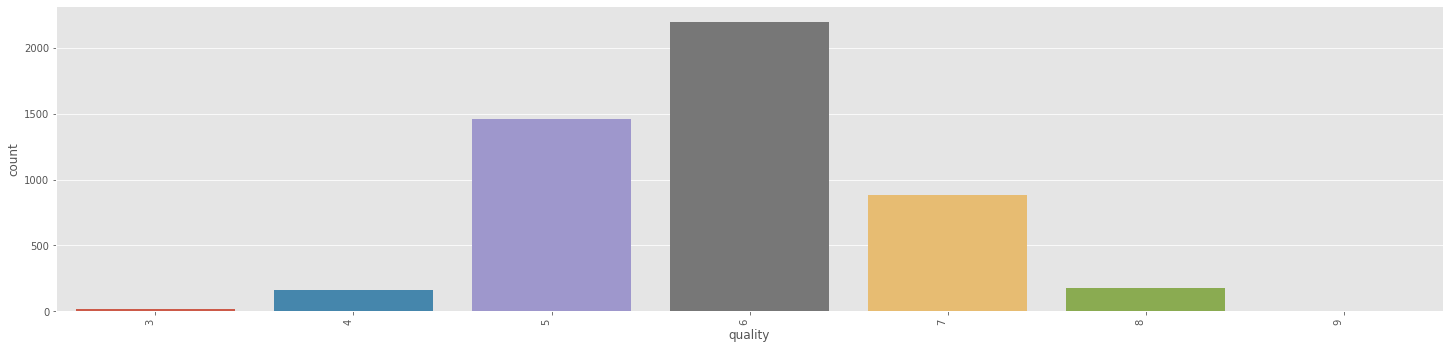

In [0]:
for i in dbwhite.columns:
  var = str(i)
  g = sb.catplot(i, data=dbwhite, kind='count', aspect=4)
  g.set_titles(i)
  for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, horizontalalignment='right')

###Se mirará las caracteristicas de la variable de salida 'quality'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


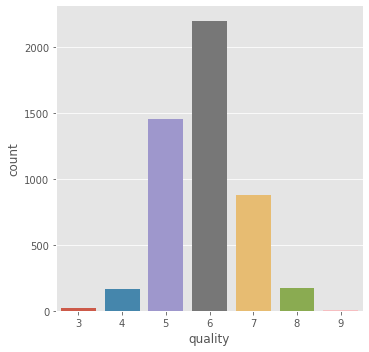

In [0]:
sb.factorplot('quality',data=dbwhite,kind="count")

In [0]:
dbwhite.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Se puede apreciar que la distribución de la variable de salida 'quality' está concentrada en el nivel 5 y 6, con lo cual puede inducir sesgo en el árbol

#### Vino rojo

##### Grafico de correlación

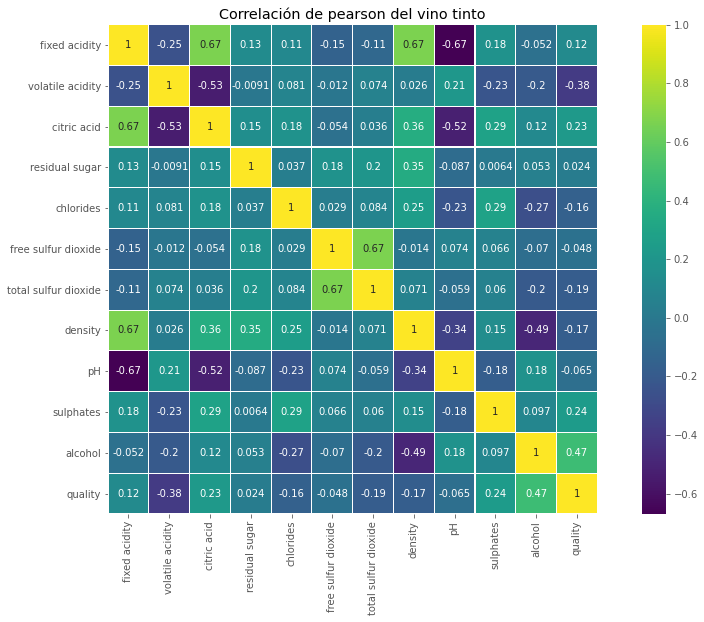

In [0]:
colormap = plt.cm.viridis
#plt.figure(figsize=(13,13))
plt.title('Correlación de pearson del vino tinto')
sb.heatmap(dbred.corr(),
          vmax=1.0,
          cmap=colormap,
          annot=True,
          linewidths=0.1,
          linecolor='white',
          square=True)

En este caso se puede apreciar que las variables con problemas de correlación son 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid', 'fixed acidity' y 'density', con lo cual se decide retirar las columnas correspondientes a 'fixed acidity' ,'total sulfur dioxide' y 'density'.

In [0]:
###Se eliminan las columnas con problema de correlación 
drop_elements = ['total sulfur dioxide','fixed acidity','density','citric acid']
dbred = dbred.drop(drop_elements, axis = 1)
# Se categorizan las variables
categ()
dbred.head()


,volatile acidity,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,0.859012,3.674,0.17972,20.88,3.6671,0.7976,10.220,5
1,1.003210,4.988,0.17972,33.66,3.3242,0.9479,10.805,5
2,0.859012,3.674,0.17972,20.88,3.4385,0.7976,10.805,5
3,0.426420,3.674,0.17972,27.27,3.3242,0.7976,10.805,6
4,0.859012,3.674,0.17972,20.88,3.6671,0.7976,10.220,5


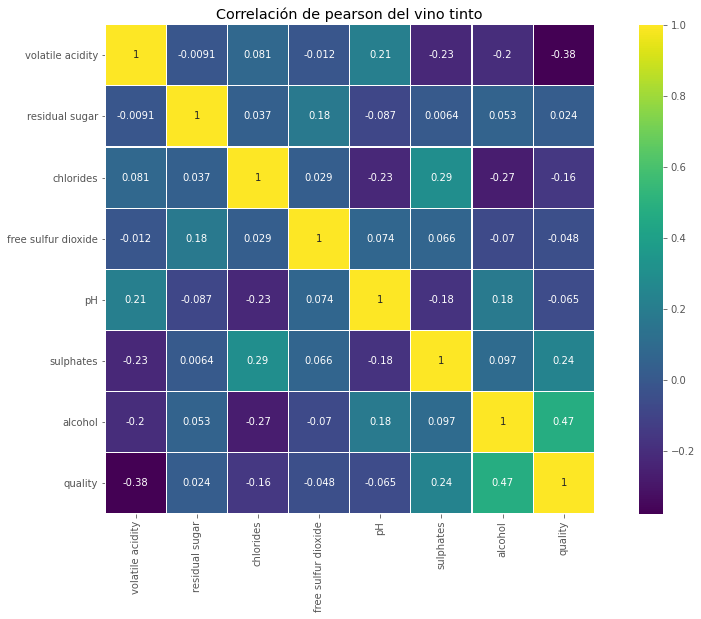

In [0]:
colormap = plt.cm.viridis
#plt.figure(figsize=(13,13))
plt.title('Correlación de pearson del vino tinto')
sb.heatmap(dbred.corr(),
          vmax=1.0,
          cmap=colormap,
          annot=True,
          linewidths=0.1,
          linecolor='white',
          square=True)

Nuevamente se puede ver que se quitó satisfactoriamente la correalación.

##### Distribuciones

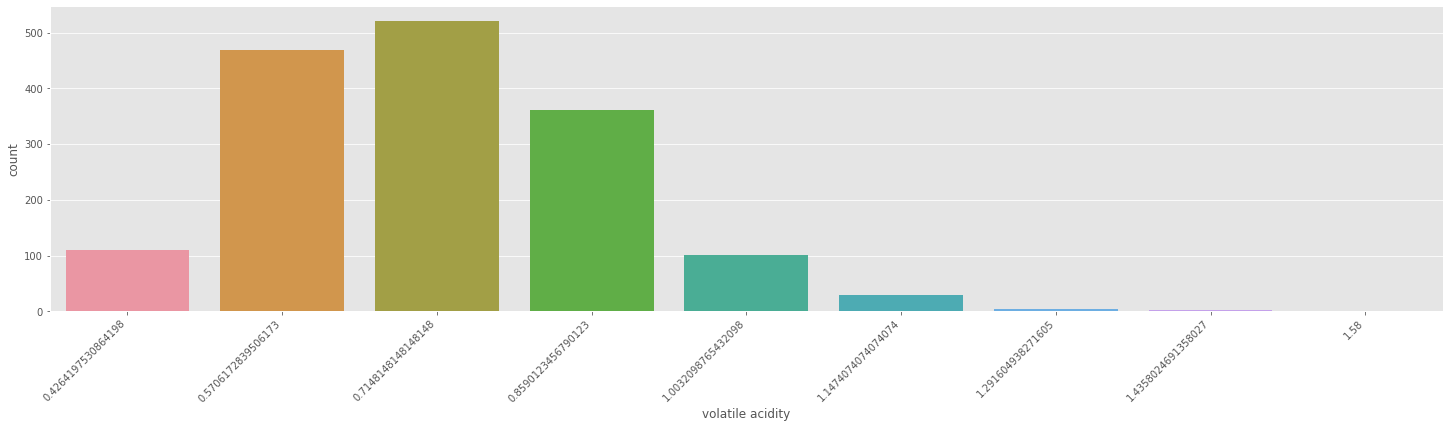

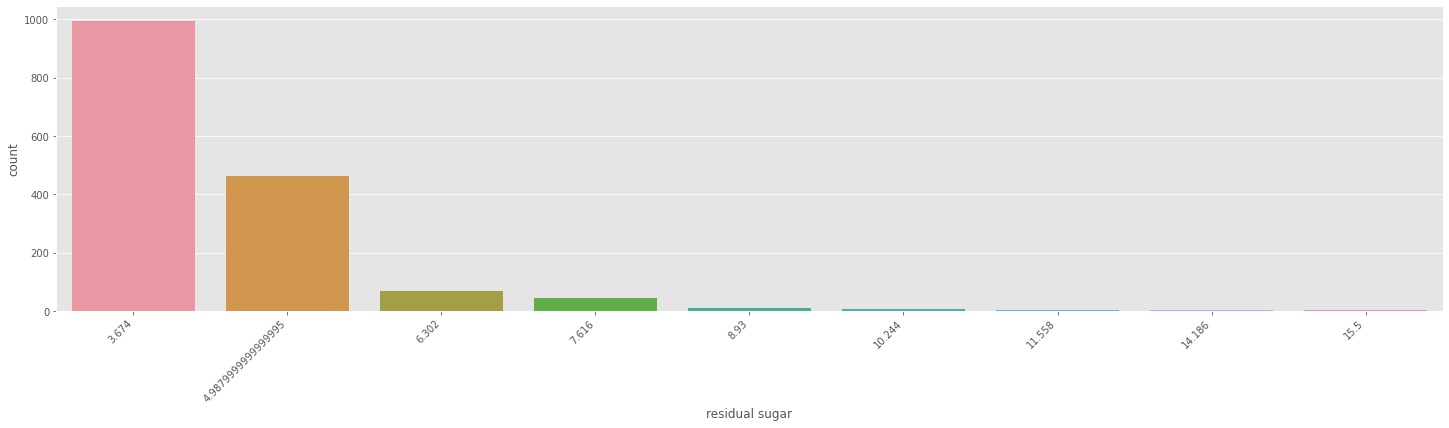

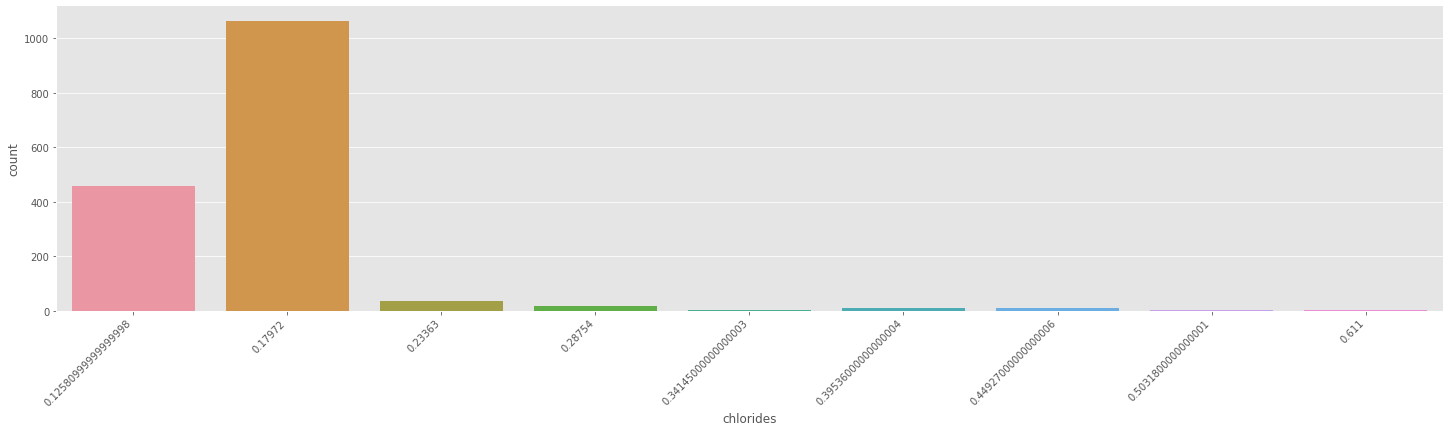

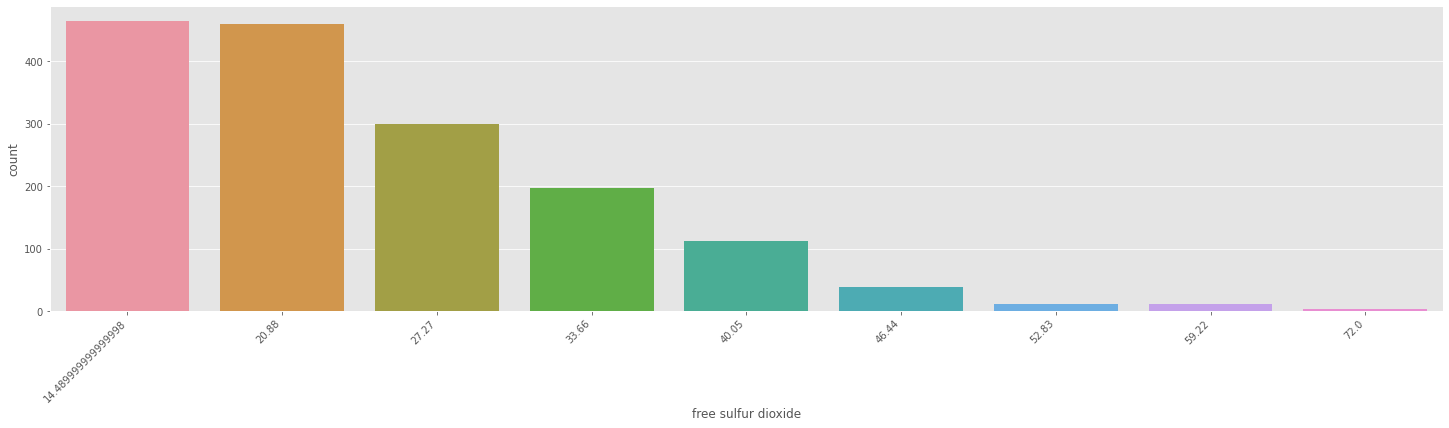

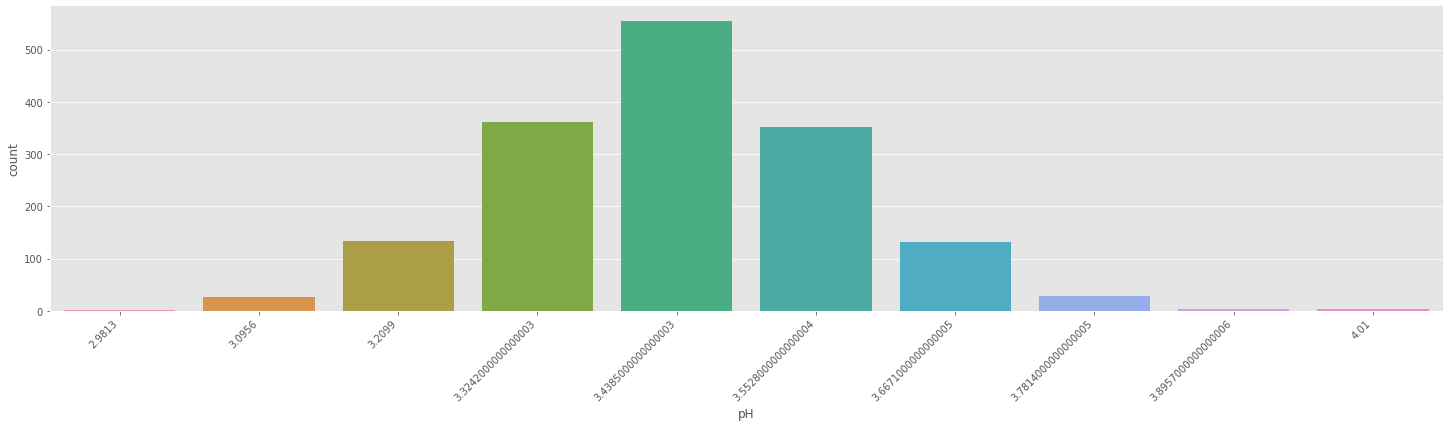

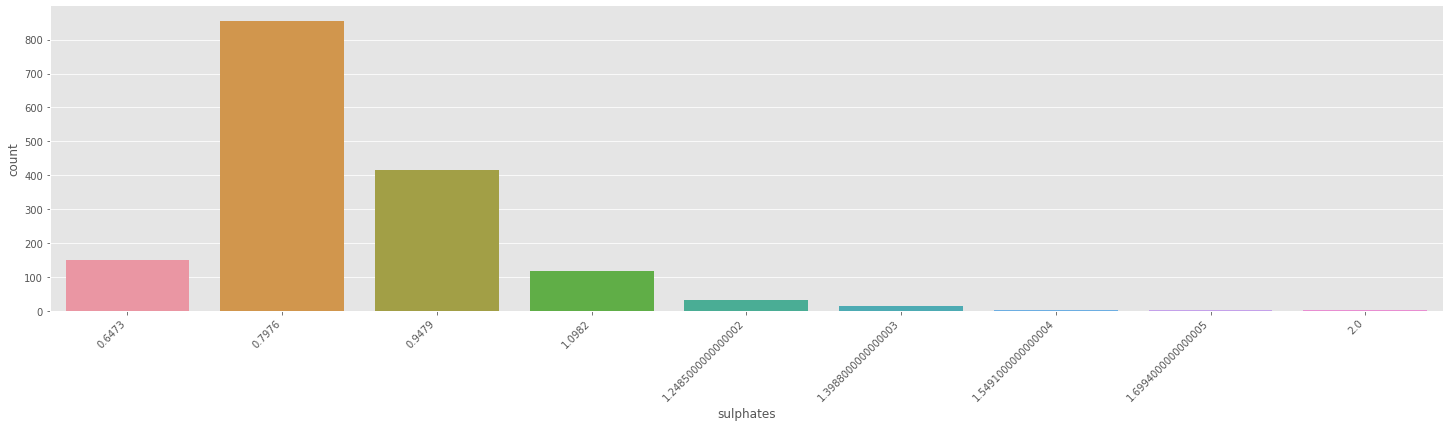

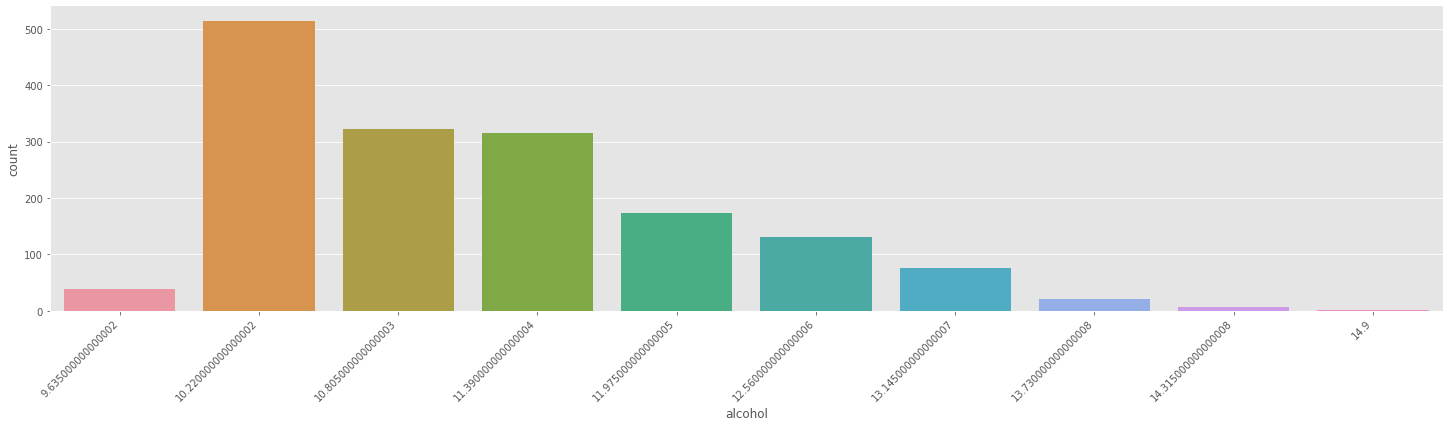

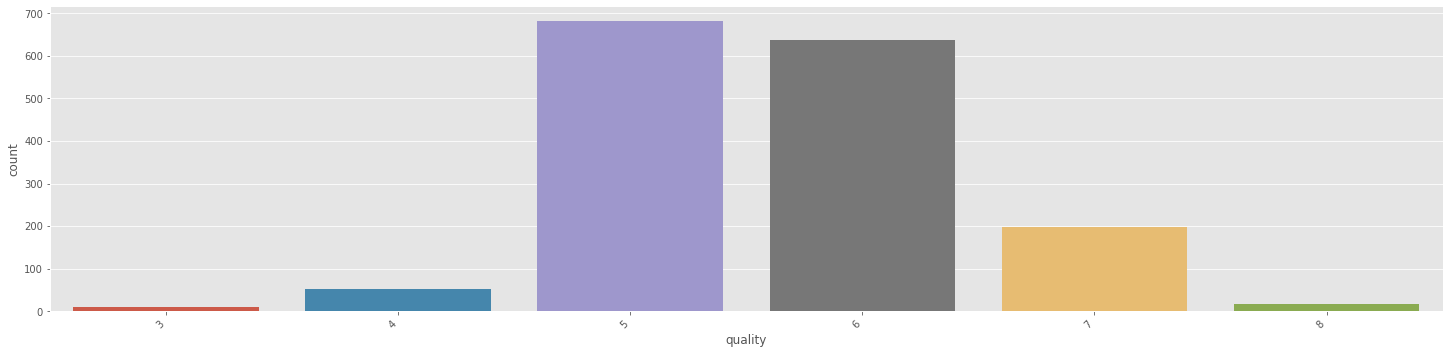

In [0]:
for i in dbred.columns:
  var = str(i)
  g = sb.catplot(i, data=dbred, kind='count', aspect=4)
  g.set_titles(i)
  for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

###Se mirará las caracteristicas de la variable de salida 'quality'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


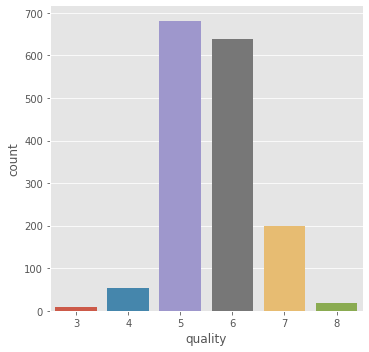

In [0]:
sb.factorplot('quality',data=dbred,kind="count")

In [0]:
dbred.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

Se puede apreciar que la distribución de la variable de salida 'quality' está concentrada en el nivel 5 y 6, con lo cual puede inducir sesgo en el árbol

## Elección de profundidad de los árboles

Difinimos antes unas variables iniciales para los dos arboles. 

* numsplit: Se refiere a la cantidad de muestras en las que vamos a particionar toda la base de datos 
* min_sample_split : Se refiere a la cantidad de datos minima que debe existir en cada nodo rama o padre (no hojas).

* min_sample_leaf : Se refiere a la cantidad minima de datos que deben existir en cada hoja.

* depth : Se refiere a la profundidad del arbol, es decir, a la cantidad de niveles que debe tener el arbol.
* class_weight: Compensa de cierta manera el desbalance de los datos (quality)

###Métrica utilizada

Se utilizará la métrica indice de Gini, esto porque la mayoría de datos que aunque están clasificados, son continuos y esta métrica funciona bien con este tipo de datos ya que lo que hace es buscar el atributo con el minimo indice de Gini para ser la nueva partición del árbol.

#Vino blanco

In [0]:

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos, 10 para 90% entrenamiento 10% validación
accuracies = list()
max_attributes = len(list(dbwhite))
depth_range = range(1, max_attributes + 1)
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=3,
                                             min_samples_leaf=3,
                                             max_depth = depth,
                                             class_weight={8:0.81}) # Por defecto todas las clases igual peso
                                                                   # Columna 8 (quality) con peso de 0.81
    for train_fold, valid_fold in cv.split(dbwhite):
        f_train = dbwhite.loc[train_fold] 
        f_valid = dbwhite.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['quality'], axis=1), 
                               y = f_train["quality"]) 
        valid_acc = model.score(X = f_valid.drop(['quality'], axis=1), 
                                y = f_valid["quality"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.459204
         2          0.500025
         3          0.518404
         4          0.512486
         5          0.524121
         6          0.511058
         7          0.509008
         8          0.493688


# Vino rojo

In [0]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos, 10 para 90% entrenamiento 10% validación
accuracies = list()
max_attributes = len(list(dbred))
depth_range = range(1, max_attributes + 1)
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=5,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={8:4}) # Por defecto todas las clases igual peso
                                                                   # Columna 8 (quality) con peso de 4
    for train_fold, valid_fold in cv.split(dbred):
        f_train = dbred.loc[train_fold] 
        f_valid = dbred.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['quality'], axis=1), 
                               y = f_train["quality"]) 
        valid_acc = model.score(X = f_valid.drop(['quality'], axis=1), 
                                y = f_valid["quality"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.557866
         2          0.537237
         3          0.565991
         4          0.544104
         5          0.544737
         6          0.522826
         7          0.482767
         8          0.503432


En el vino blanco se muestra más precision con una profundidad del árbol de 5.
En el caso del vino rojo con una profundidad de 3 tiene la mejor precisión.

####Para ambos árboles los valores de número de muestras por nodo y número de muestras por hoja se obtuvieron haciendo pruebas con distintos valores, los que otorgaran mayor precisión fueron los que se dejaron.

#Creación de los árboles

El nodo raiz la misma librería lo determina, utilizando en este caso la métrica Gini.

##Árbol de vino blanco

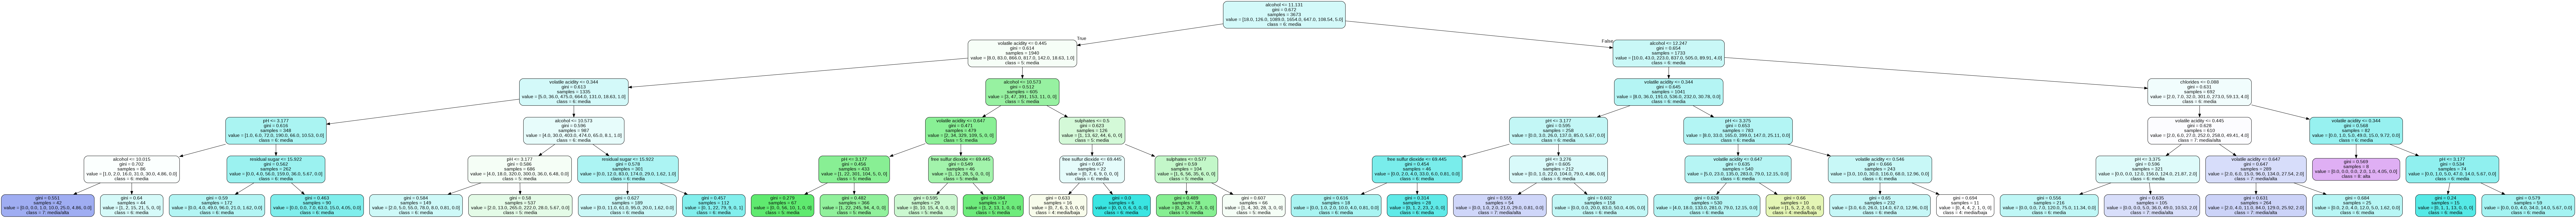

In [0]:
# Crear arrays de entrenamiento y pruebas 
y = dbwhite['quality']
x = dbwhite.drop(['quality'], axis=1).values 
x_train1,x_test1,y_train1,y_test1= train_test_split(x,y,random_state=1) #divide automaticamente entrenamiento y pruebas

# Crear Arbol de decision con profundidad = 5
decision_tree1 = tree.DecisionTreeClassifier(criterion='gini',
                                            min_samples_split=5,
                                            min_samples_leaf=5,
                                            max_depth = 5,
                                            class_weight={8:0.81})

decision_tree1.fit(x_train1, y_train1)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree1,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(dbwhite.drop(['quality'], axis=1)),
                              class_names = ['3: baja','4: media/baja','5: media','6: media','7: media/alta','8: alta','9: alta'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

##Árbol vino rojo

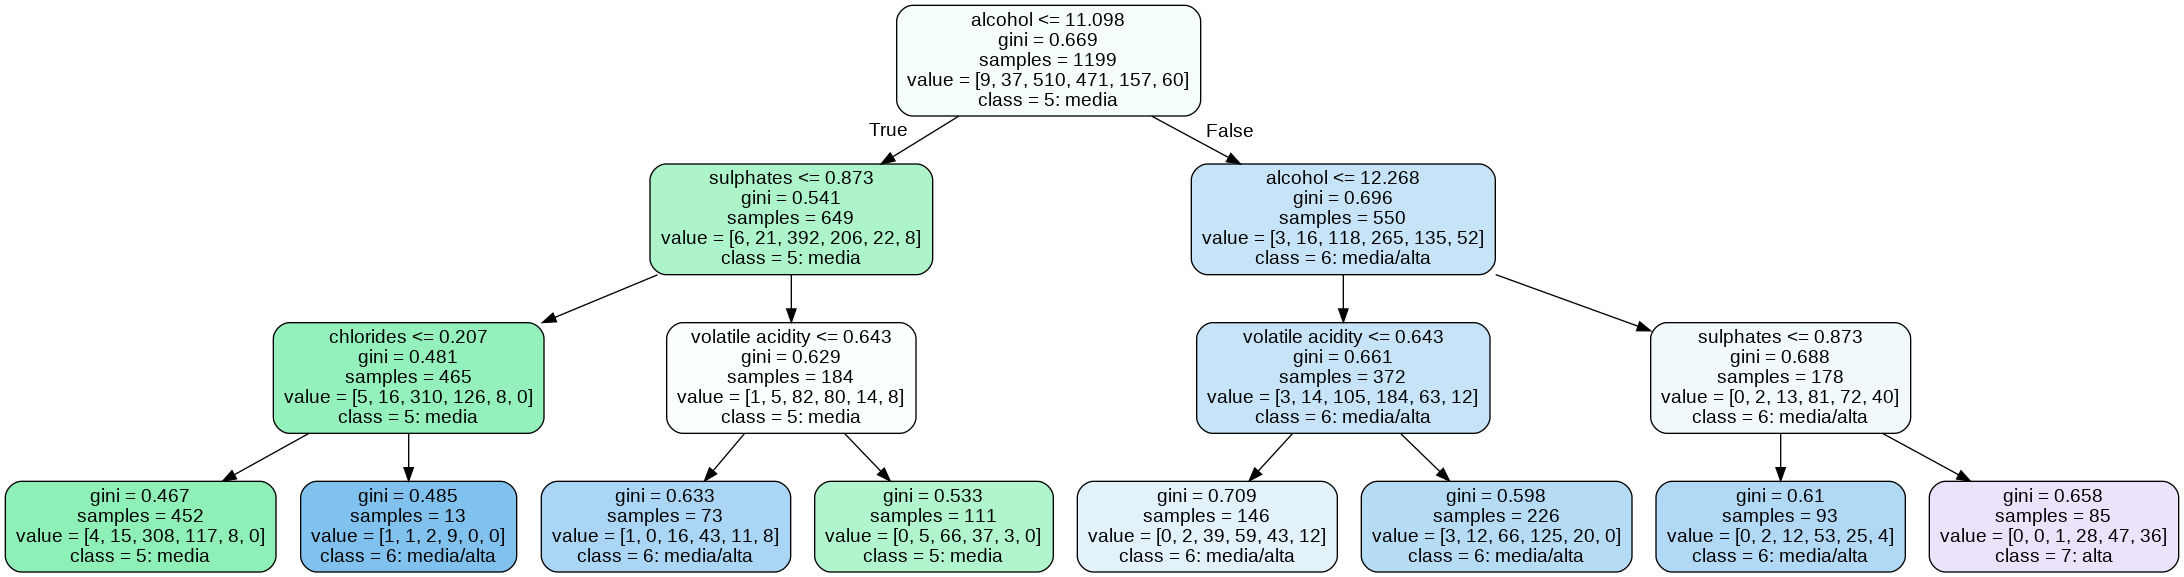

In [0]:
# Crear arrays de entrenamiento y pruebas
y2 = dbred['quality']
x2 = dbred.drop(['quality'], axis=1).values 
x_train2,x_test2,y_train2,y_test2= train_test_split(x2,y2,random_state=1) #divide automaticamente entrenamiento y pruebas

# Crear Arbol de decision con profundidad = 3
decision_tree2 = tree.DecisionTreeClassifier(criterion='gini',
                                            min_samples_split=5,
                                            min_samples_leaf=5,
                                            max_depth = 3,
                                            class_weight={8:4})
decision_tree2.fit(x_train2, y_train2)

# exportar el modelo a archivo .dot
with open(r"tree2.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree2,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(dbred.drop(['quality'], axis=1)),
                              class_names = ['3: baja','4: baja','5: media','6: media/alta','7: alta','8: alta'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree2.dot','-o',r'tree2.png'])
PImage("tree2.png")

###Cantidad de datos de entrenamiento y de prueba

Según la librería sklearn.model_selection, se usaron los siguientes porcentajes de datos para entrenamiento y pruebas:

In [0]:
print("Porcentaje de datos para el árbol de vino blanco")
print("datos de entrenamiento: "+ str(round(len(x_train1)*100/len(dbwhite),2)))
print("datos de pruebas: "+ str(round(len(x_test1)*100/len(dbwhite),2)))

Porcentaje de datos para el árbol de vino blanco
datos de entrenamiento: 74.99
datos de pruebas: 25.01


In [0]:
print("Porcentaje de datos para el árbol de vino rojo")
print("datos de entrenamiento: "+ str(round(len(x_train2)*100/len(dbred),2)))
print("datos de pruebas: "+ str(round(len(x_test2)*100/len(dbred),2)))

Porcentaje de datos para el árbol de vino rojo
datos de entrenamiento: 74.98
datos de pruebas: 25.02


##Presición 

A continuación se mostrará la precisión de ambos árboles

In [0]:
acc_decision_tree1 = round(decision_tree1.score(x_test1, y_test1) * 100, 2)
acc_decision_tree2 = round(decision_tree2.score(x_test2, y_test2) * 100, 2)
print("La precisión del arbol de vino blanco es de: ")
print(acc_decision_tree1,'%')
print("La precisión del arbol de vino rojo es de: ")
print(acc_decision_tree2,'%')

La precisión del arbol de vino blanco es de: 
51.18 %
La precisión del arbol de vino rojo es de: 
59.5 %


#Clasificación Bayesiana

##En este caso se utilizará el modelo Gaussain Naive Bayes

###Para el vino blanco, se eligen las mismas variables usadas en el árbol y se procede a verificar la precisión usando este modelo

In [0]:
# Split dataset in training and test datasets
X_train, X_test = train_test_split(dbwhite, test_size=0.2, random_state=6) 
y_train =X_train["quality"]
y_test = X_test["quality"]
#seleccion de caracteristicas
X=dbwhite.drop(['quality'], axis=1)
y=dbwhite['quality']
best=SelectKBest(k=7)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)
X_new.shape
used_features =X.columns[selected]
# Se usan los mismos datos de entrenamiento y pruebas, usados para cada árbol de decisión
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print("VINO BLANCO") 
print('Presición de entrenamiento : {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Presición en prueba : {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))


VINO BLANCO
Presición de entrenamiento : 0.47
Presición en prueba : 0.47


###Para el vino rojo tambien se mantienen las mismas variables del arbol y se verifica la precisión

In [0]:
# Split dataset in training and test datasets
X_train2, X_test2 = train_test_split(dbred, test_size=0.2, random_state=6) 
y_train2 =X_train2["quality"]
y_test2 = X_test2["quality"]
#seleccion de caracteristicas
X2=dbred.drop(['quality'], axis=1)
y2=dbred['quality']
best2=SelectKBest(k=7)
X_new2 = best2.fit_transform(X2, y2)
selected2 = best2.get_support(indices=True)
X_new2.shape
used_features2 =X2.columns[selected]
# Se usan los mismos datos de entrenamiento y pruebas, usados para cada árbol de decisión
# Instantiate the classifier
gnb2 = GaussianNB()
# Train classifier
gnb2.fit(
    X_train2[used_features2].values,
    y_train2
)
y_pred2 = gnb.predict(X_test2[used_features2])

print("VINO ROJO") 
print('Presición de entrenamiento : {:.2f}'
     .format(gnb2.score(X_train2[used_features2], y_train2)))
print('Presición en prueba : {:.2f}'
     .format(gnb2.score(X_test2[used_features2], y_test2)))

VINO ROJO
Presición de entrenamiento : 0.58
Presición en prueba : 0.57


#Pruebas

###A continuación se harán pruebas con los árboles de los dos vinos , el primero un vino blanco y el segundo rojo. Se probará la predicción dada, comparado con la calidad que dieron los expertos.

In [0]:
vino1 = {'volatile acidity':0.86,
         'residual sugar':3.67,'chlorides':0.18, 'free sulfur dioxide':20.88,
         'pH':3.44, 'sulphates':0.789, 'alcohol':10.80, 'quality':5}
vino2 = {'volatile acidity':0.36,
         'residual sugar':26,'chlorides':0.07, 'free sulfur dioxide':59.4,
         'pH':30.5, 'sulphates':0.48, 'alcohol':9.25, 'quality':5}

probarVinoBlanco(vino1)
probarVinoRojo(vino2)


Prediccion: [5]
Probabilidad de Acierto: [45.45]%
Prediccion: [5]
Probabilidad de Acierto: [68.14]%


###Se puede ver que tiene un mejor porcentaje de acierto el árbol de vino rojo, no obstante, los dos arrojaron el resultado esperado.

####Ahora se probará los mismos vinos con clasificación bayesiana

In [0]:
print(gnb.predict([[0.86,3.67,0.18,20.88,3.44,0.789,10.80]]))
print(gnb2.predict([[0.36,26,0.07,59.4,30.5,0.48,9.25]]))

[3]
[4]


En este caso la predicción no estuvo acertada, ya que ambos vinos pertenecen a la calidad 5 dada por el experto.

#Referencias 

##
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol